In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.optimize as op
from scipy.interpolate import interp1d
from scipy.interpolate import RectBivariateSpline
from constants import *

# Joint $\{e,\omega\}$ distribution

In [ ]:
e_ = 0.1*1.5*np.arange(1,5)
w_ = np.linspace(-0.5*pi, 1.5*pi)


colors = ["red", "orange", "green", "blue", "purple", "black"]

def f(e,w):
    return (1+e*np.sin(w))/(1-e**2)

plt.figure()
for i, e_i in enumerate(e_):
    plt.plot(w_, f(e_i, w_), c=colors[i], label="{0:.2f}".format(e_i))
plt.xlabel("$\omega$")
plt.legend()
plt.show()

# Precompute a grid of $\{e, \omega\}$ transit probabilities

In [ ]:
npts = 1001

e_uni = np.linspace(0,1,npts)
w_uni = np.linspace(0,2*pi,npts)

grid = {}
grid["ecc"] = np.tile(e_uni, npts).reshape((npts,npts))
grid["omega"] = np.repeat(w_uni, npts).reshape(npts,npts)
grid["weight"] = (1 + grid["ecc"]*np.sin(grid["omega"]))/(2*pi)
grid["weight"] /= np.sum(grid["weight"])

### Draw uniform samples, calculate weights via interpolations, and plot weighted histogram

In [ ]:
ndraw = int(1e6)

RBS = RectBivariateSpline(e_uni, w_uni, grid["weight"].T)

e_draw = np.random.uniform(0, 1, ndraw)
w_draw = np.random.uniform(0, 2*pi, ndraw)

wd = RBS.ev(e_draw, w_draw)

fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].hist(e_draw, weights=wd, color="C0")
ax[1].hist(w_draw, weights=wd, color="C1")

plt.show()

# Draw samples with inverse transform sampling on an interpolated grid

In [4]:
ngrid = 101
ndraw = int(1e6)

e_uni = np.linspace(0,1,ngrid)
z_uni = np.linspace(0,1,ngrid)

omega_grid = np.zeros((ngrid,ngrid))

for i, e_ in enumerate(e_uni):
    x = np.linspace(-0.5*pi, 1.5*pi, int(1e4))
    y = (1 + e_*np.sin(x))/(2*pi)
    
    cdf = np.cumsum(y)
    cdf -= cdf.min()
    cdf = cdf/cdf.max()
    inv_cdf = interp1d(cdf, x)
    
    omega_grid[i] = inv_cdf(z_uni)
    
RBS = RectBivariateSpline(e_uni, z_uni, omega_grid)

e_draw = np.random.uniform(0, 1, ndraw)
z_draw = np.random.uniform(0, 1, ndraw)
w_draw = RBS.ev(e_draw, z_draw)

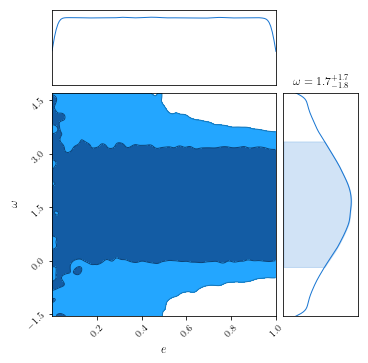

In [6]:
from chainconsumer import ChainConsumer

c = ChainConsumer()
c.add_chain([e_draw, w_draw], parameters=["$e$", "$\omega$"])
c.plotter.plot(figsize=(5,5));